In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"E:\codes\AI&ML\project\credit risk scoring system\credit-risk-scoring\lending_club_cleaned_v1.csv")
data.head()

,term,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_Joint App,initial_list_status_w
0,60,660.0,18.0,0.0,86.8,40440.0,16.99,15.16,1.0,17775.0,...,0,0,0,0,0,0,0,1,0,0
1,60,740.0,26.0,0.0,103.5,59000.0,15.61,16.74,4.0,29175.0,...,0,0,0,0,0,0,0,1,0,0
2,36,700.0,47.0,0.0,11.4,40000.0,7.90,20.34,1.0,6000.0,...,0,0,0,0,0,1,0,0,0,1
3,60,665.0,26.0,0.0,56.2,70000.0,16.99,23.15,7.0,15600.0,...,0,0,0,0,0,0,0,1,0,0
4,36,700.0,15.0,1.0,67.1,120000.0,14.98,17.88,1.0,10000.0,...,0,0,1,0,0,0,0,1,0,0


In [10]:
data.shape

(236846, 36)

In [6]:
x = data.drop(columns=['loan_status'])
y = data['loan_status']

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [21]:
X_train, X_test , y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
scaling = StandardScaler()
x_train_scaled = scaling.fit_transform(X_train)
x_test_scaled = scaling.transform(X_test)


In [35]:
model = LogisticRegression(max_iter=1000,class_weight='balanced')

In [36]:
model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [37]:
model.score(x_train_scaled,y_train)

0.7412126074014651

In [38]:
model.score(x_test_scaled,y_test)

0.7407219759341356

In [39]:
print(classification_report(y_test,model.predict(x_test_scaled)))

              precision    recall  f1-score   support

           0       0.36      0.69      0.47      7951
           1       0.92      0.75      0.83     39419

    accuracy                           0.74     47370
   macro avg       0.64      0.72      0.65     47370
weighted avg       0.83      0.74      0.77     47370



In [40]:
model.coef_

array([[-0.45090256,  0.24322677,  0.09181612, -0.01866314,  0.08073324,
        -0.00395433, -0.73704487, -0.22664608,  0.13560656, -0.07737538,
        -0.02178479,  0.08791014, -0.20740224, -0.14301985,  0.08266669,
        -0.03918388, -0.0874742 , -0.10280557,  0.01908076, -0.06716922,
        -0.00688889, -0.03011613, -0.02431505, -0.00852172, -0.02844467,
         0.00205551, -0.04573693, -0.01579904,  0.06254395, -0.0847155 ,
        -0.18123668, -0.06459022, -0.08211958,  0.01935841,  0.00697391]])

In [41]:
from sklearn.pipeline import make_pipeline

In [42]:
test_score = []
for lam in np.arange(0.1,100,0.1):
    pipe = make_pipeline(StandardScaler(),LogisticRegression(C=1/lam,class_weight='balanced'))
    pipe.fit(x_train_scaled,y_train)
    score = pipe.score(x_test_scaled,y_test)
    test_score.append(score)

In [47]:
import matplotlib.pyplot as plt

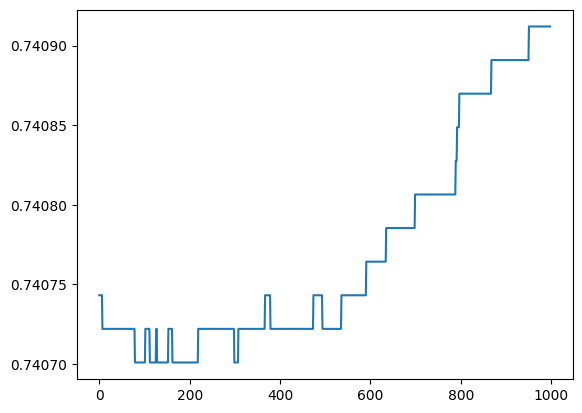

In [48]:
plt.plot(test_score)

In [49]:
np.argmax(test_score)

np.int64(951)

In [50]:
model = LogisticRegression(C=1/951,class_weight='balanced')

In [51]:
model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.0010515247108307045
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [52]:
model.score(x_train_scaled,y_train)

0.7414606599252676

In [53]:
print(classification_report(y_test,model.predict(x_test_scaled)))


              precision    recall  f1-score   support

           0       0.36      0.69      0.47      7951
           1       0.92      0.75      0.83     39419

    accuracy                           0.74     47370
   macro avg       0.64      0.72      0.65     47370
weighted avg       0.83      0.74      0.77     47370

